# Introduction to Whole slide images

## What is Wole Slide Image (WSI)?

Whole slide imaging (WSI) refers to the digital images of histological slides, which are often stained using [H&E stains](https://en.wikipedia.org/wiki/H%26E_stain) or [IHC stains](https://en.wikipedia.org/wiki/Immunohistochemistry). By using a digital scanner that combines a camera with microscopy, we can create detailed digital versions of tissue slides that capture subcellular structures.

What sets WSI apart from other imaging data is its massive file size, which can easily reach gigabytes after compression. This large size makes processing and analyzing these images more challenging, as it's difficult to read the whole image into memory.

## The pyramids structure in WSI

The pyramid structure means storing the same image at multiple resolutions, like a stack of layers, with the full-resolution image at the base (level 0) and progressively lower resolutions as you move up (level N). 

This structure solves the problem of WSI's massive file size by allowing users to quickly access and view lower-resolution versions for an overview while still having the option to zoom in for detailed examination without loading the entire high-resolution image at once. This deisgn makes navigate and analyze WSI files faster and more efficient.

<img src='https://github.com/rendeirolab/LazySlide/blob/main/assets/WSI_intro.png?raw=true' width='500px' class="shadow mb-2">

## WSIs file formats

Below is a table of file formats available on the market. Most of these are proprietary, meaning you can read the files but cannot create them. `.tiff` is an open-sourced file format.

<table border="1">
    <thead>
        <tr>
            <th>Format</th>
            <th>File Extensions</th>
            <th>Vendor</th>
            <th>Notes</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Aperio</td>
            <td>.svs, .tif</td>
            <td>Leica Biosystems</td>
            <td>Supports multiple compression formats.</td>
        </tr>
        <tr>
            <td>Hamamatsu</td>
            <td>.vms, .vmu, .ndpi</td>
            <td>Hamamatsu</td>
            <td>Widely used in digital pathology.</td>
        </tr>
        <tr>
            <td>Leica</td>
            <td>.scn</td>
            <td>Leica Biosystems</td>
            <td>Used in clinical and research applications.</td>
        </tr>
        <tr>
            <td>Mirax</td>
            <td>.mrxs</td>
            <td>3DHISTECH</td>
            <td>Can contain multiple images per slide.</td>
        </tr>
        <tr>
            <td>Philips</td>
            <td>.tiff</td>
            <td>Philips</td>
            <td>Optimized for pathology workflows.</td>
        </tr>
        <tr>
            <td>Sakura</td>
            <td>.svslide</td>
            <td>Sakura Finetek</td>
            <td>Less commonly used format.</td>
        </tr>
        <tr>
            <td>Trestle</td>
            <td>.tif</td>
            <td>Trestle Corporation</td>
            <td>Older format, may have compatibility issues.</td>
        </tr>
        <tr>
            <td>Ventana</td>
            <td>.bif</td>
            <td>Roche</td>
            <td>Supports multi-layer images.</td>
        </tr>
        <tr>
            <td>DICOM</td>
            <td>.dcm</td>
            <td>Standard</td>
            <td>Medical imaging standard; support may vary.</td>
        </tr>
        <tr>
            <td>Zeiss</td>
            <td>.czi</td>
            <td>Zeiss</td>
            <td>High-resolution imaging format.</td>
        </tr>
        <tr>
            <td>Generic TIFF</td>
            <td>.tif, .tiff</td>
            <td>Various</td>
            <td>Common format; may lack specific WSI metadata.</td>
        </tr>
    </tbody>
</table>

# Hands on

Now let's use a [GTEx histology](https://gtexportal.org/home/histologyPage) slide as an example to help you understand different aspects of WSI that are useful for downstream analysis.

If you find something you don't understand, don't worry, we will cover them in the next section on using `LazySlide` and `wsidata`.

## Load the slide file

You can download the example slide from: https://brd.nci.nih.gov/brd/imagedownload/GTEX-1117F-1626

In [1]:
from wsidata import open_wsi

wsi = open_wsi("GTEX-1117F-1626.svs")
wsi

WSI: GTEX-1117F-1626.svs
Reader: openslide
SpatialData object
└── Images
      └── 'wsi_thumbnail': DataArray[cyx] (3, 1439, 1696)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)

## Take a look at the content

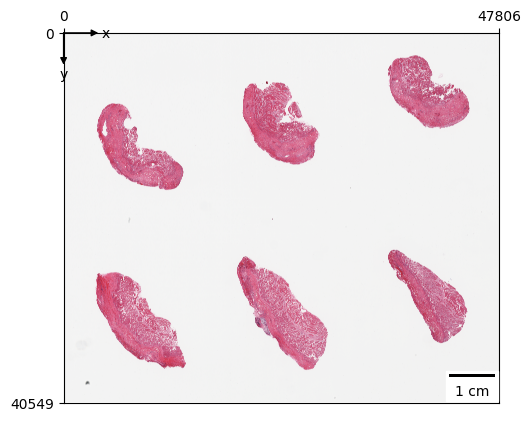

In [6]:
import lazyslide as zs

zs.pl.tissue(wsi)

## Examine the pyramids structure

In the example WSI, we have 3 levels.  Notice that as the number of level gets bigger, we have a lower size of image height and width while the number downsample gets larger.

:::{tip}
The downsample factor always uses the level 0 as reference.
:::

In [7]:
wsi.fetch.pyramids()

,height,width,downsample
level,,,
0,40553,47807,1.000000
1,10138,11951,4.000175
2,2534,2987,16.004287


## Check the properties of WSI

- **shape**: The dimensions of the full-resolution image in pixels, given as `[width, height]`.
- **n_level**: The number of resolution levels available in the image pyramid, including the full resolution.
- **level_shape**: A list of the dimensions for each level in the pyramid, starting from the full resolution down to the lowest resolution.
- **level_downsample**: The downsample factors for each level compared to the full resolution, indicating how much each level is scaled down.
- **mpp** (Microns per Pixel): The physical size of one pixel in micrometers, indicating the scanning resolution.
- **magnification**: The optical magnification used during scanning, which helps in understanding the scale of the captured image.
- **bounds**: The coordinates of the bounding box that defines the image area on the slide, given as `[x, y, width, height]`.


:::{note}
The **mpp** and **magnification** are related to each other:

- 20X magnification ≈ 0.5 mpp
- 40X magnification ≈ 0.25 mpp

These values are useful for harmonizing slides scanned at different resolutions.
:::

In [8]:
wsi.properties

Field,Value
shape,"[40553, 47807]"
n_level,3
level_shape,"[[40553, 47807], [10138, 11951], [2534, 2987]]"
level_downsample,"[1.0, 4.0001748319017985, 16.004286728943022]"
mpp,0.4942
magnification,20.0
bounds,"[0, 0, 47807, 40553]"
